<a href="https://www.kaggle.com/code/aleksandrmorozov123/computer-vision-with-pytorch?scriptVersionId=171187586" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

**This notebook about computer vision models with PyTorch**

In [1]:
import torch
import torchvision
torch.cuda.is_available()

True

**Working with tensors**

In [2]:
# define tensor wit default data type
x = torch.ones (2, 2)
print (x)
print (x.dtype)

tensor([[1., 1.],
        [1., 1.]])
torch.float32


In [3]:
# specify data type
x = torch.ones (2, 2, dtype = torch.int8)
print (x)
print (x.dtype)

tensor([[1, 1],
        [1, 1]], dtype=torch.int8)
torch.int8


In [4]:
# change tensor data type
x = torch.ones (1, dtype = torch.uint8)

print (x.dtype)

x = x.type (torch.float)
print (x.dtype)

torch.uint8
torch.float32


In [5]:
# converting tensors to NumPy arrays
x = torch.rand (2, 2)
print (x)
print (x.dtype)

y = x.numpy ()
print (y)
print (y.dtype)

tensor([[0.7744, 0.1845],
        [0.3113, 0.0355]])
torch.float32
[[0.7744064  0.18447667]
 [0.31130773 0.03547716]]
float32


In [6]:
# converting NumPy arrays to tensors
import numpy as np

x = np.zeros ((2, 2), dtype = np.float32)
print (x)
print (x.dtype)

y = torch.from_numpy (x)
print (x)
print (y.dtype)

[[0. 0.]
 [0. 0.]]
float32
[[0. 0.]
 [0. 0.]]
torch.float32


In [7]:
# move tensors between devices

# define a tensor
x = torch.tensor ([1.5, 2])
print (x)
print (x.device)

tensor([1.5000, 2.0000])
cpu


In [8]:
# move tensor onto GPU
device = torch.device ("cuda:0")
x = x.to (device)
print (x)
print (x.device)

tensor([1.5000, 2.0000], device='cuda:0')
cuda:0


In [9]:
# move tensor onto cpu
device = torch.device ('cpu')
x = x.to (device)
print (x)
print (x.device)

tensor([1.5000, 2.0000])
cpu


**Loading and processing data from PyTorch datasets - get the FashionMNIST dataset, it's not overused as MNIST**
https://github.com/zalandoresearch/fashion-mnist

In [10]:
from torchvision import datasets

path2data = 'FashionMNIST/raw/train-images-idx3-ubyte'

train_data = torchvision.datasets.FashionMNIST(path2data, train = True, download=True)

x_train, y_train = train_data.data, train_data.targets
print (x_train.shape)
print (y_train.shape)

val_data = torchvision.datasets.FashionMNIST(path2data, train = False, download=True)
x_val, y_val = val_data.data, val_data.targets
print (x_val.shape)
print (y_val.shape)


100%|██████████| 26421880/26421880 [00:02<00:00, 9494883.77it/s] 


Extracting FashionMNIST/raw/train-images-idx3-ubyte/FashionMNIST/raw/train-images-idx3-ubyte.gz to FashionMNIST/raw/train-images-idx3-ubyte/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 135321.57it/s]


Extracting FashionMNIST/raw/train-images-idx3-ubyte/FashionMNIST/raw/train-labels-idx1-ubyte.gz to FashionMNIST/raw/train-images-idx3-ubyte/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 2549934.57it/s]


Extracting FashionMNIST/raw/train-images-idx3-ubyte/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to FashionMNIST/raw/train-images-idx3-ubyte/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 24705122.42it/s]

Extracting FashionMNIST/raw/train-images-idx3-ubyte/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to FashionMNIST/raw/train-images-idx3-ubyte/FashionMNIST/raw

torch.Size([60000, 28, 28])
torch.Size([60000])
torch.Size([10000, 28, 28])
torch.Size([10000])


**Display images**

torch.Size([60000, 1, 28, 28])
torch.Size([3, 212, 242])


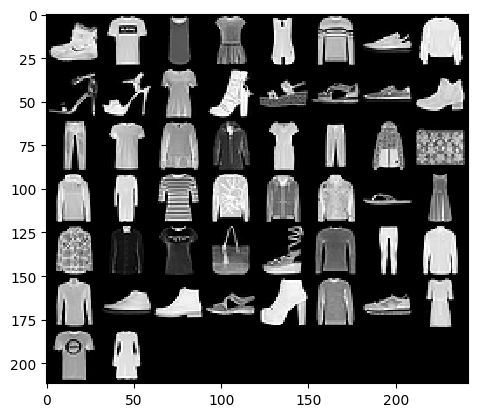

In [11]:
from torchvision import utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# adding a dimension to tensor to become B*C*H*H
if len (x_train.shape) == 3:
    x_train = x_train.unsqueeze (1)
print (x_train.shape)

if len(x_val.shape) == 3:
    x_val = x_val.unsqueeze (1)
    
# make a grid of 50 images, 8 images per row
x_grid = utils.make_grid (x_train[:50], nrow = 8, padding = 2)
print (x_grid.shape)

# function to display images
def show (img):
    # convert tensor to numpy array
    npimg = img.numpy ()
    
    # convert to H*W*C shape
    npimg_tr = np.transpose (npimg, (1, 2, 0))
    
    # display images
    plt.imshow (npimg_tr, interpolation = 'nearest')
    
# call function for display images
show (x_grid)

**Data transformation**

Text(0.5, 1.0, 'transformed')

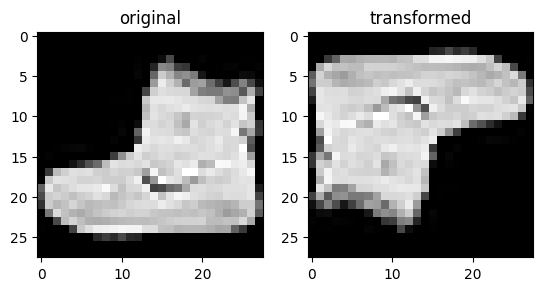

In [12]:
from torchvision import transforms

# loading FashionMNIST training dataset
train_data = torchvision.datasets.FashionMNIST(path2data, train = True, download=True)

# define transformations
data_transform = transforms.Compose([transforms.RandomHorizontalFlip(p=1),
                                    transforms.RandomVerticalFlip(p=1),
                                    transforms.ToTensor(),
                                    ])

# get a sample image from training dataset
img = train_data[0][0]

# tranform sample image
img_tr=data_transform(img)

# convert tensor to numpy array
img_tr_np=img_tr.numpy()

# show original and transformed images
plt.subplot(1,2,1)
plt.imshow(img,cmap = "gray")
plt.title("original")
plt.subplot(1,2,2)
plt.imshow(img_tr_np[0],cmap = "gray");
plt.title("transformed")

In [13]:
# define transformations
data_transform = transforms.Compose([
                                        transforms.RandomHorizontalFlip(1),
                                        transforms.RandomVerticalFlip(1),
                                        transforms.ToTensor(),])

# Loading MNIST training data with on-the-fly transformations
train_data = torchvision.datasets.FashionMNIST(path2data, train = True, download = True,
transform = data_transform )

# wrap tensors into a dataset
from torch.utils.data import TensorDataset

train_ds = TensorDataset (x_train, y_train)
val_ds = TensorDataset (x_val, y_val)

for x, y in train_ds:
    print (x.shape, y.item ())
    break

torch.Size([1, 28, 28]) 9


In [14]:
# iterate over dataset
from torch.utils.data import DataLoader

# create a data loader from dataset
train_dl = DataLoader (train_ds, batch_size = 8)
val_dl = DataLoader (val_ds, batch_size = 8)

# iterate over batches
for xb, yb in train_dl:
    print (xb.shape)
    print (yb.shape)
    break

torch.Size([8, 1, 28, 28])
torch.Size([8])


**Building the models**

In [15]:
from torch import nn

# input tensor dimension 64*1000
input_tensor = torch.randn (64, 1000)

# linear layer with 1000 inputs and 100 outputs
linear_layer = nn.Linear (1000, 100)

# output of the linear layer 
output = linear_layer (input_tensor)
print (output.size ())

torch.Size([64, 100])


In [16]:
# define models using nn.Sequential

from torch import nn

# define a two layer model
model = nn.Sequential (nn.Linear (4, 5),
                      nn.ReLU (), # ReLU is not shown in the figure.
                      nn.Linear (5, 1),)
print (model)

Sequential(
  (0): Linear(in_features=4, out_features=5, bias=True)
  (1): ReLU()
  (2): Linear(in_features=5, out_features=1, bias=True)
)


In [17]:
# define models using nn.Module

import torch.nn.functional as F

class Net (nn.Module):
    def __init__ (self):
        super (Net, self).__init__()
        self.conv1 = nn.Conv2d (1, 8, 5, 1)
        self.conv2 = nn.Conv2d (8, 16, 5, 1)
        self.fc1 = nn.Linear (4*4*16, 100)
        self.fc2 = nn.Linear (100, 10)
        
    def forward (self, x):
        x = F.relu (self.conv1 (x))
        x = F.max_pool2d (x, 2, 2)
        x = F.relu (self.conv2 (x))
        x = F.max_pool2d (x, 2, 2)
        x = x.view (-1, 4*4*16)
        x = F.relu (self.fc1 (x))
        x = self.fc2 (x)
        return F.log_softmax (x, dim = 1)
    
model = Net ()
print (model)
    

Net(
  (conv1): Conv2d(1, 8, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=256, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=10, bias=True)
)


In [18]:
# move model to device
device = torch.device ('cuda:0')
model.to(device)
print (next (model.parameters ()).device)

cuda:0


In [19]:
# show model summary
!pip install torchsummary
from torchsummary import summary

summary (model, input_size = (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 24, 24]             208
            Conv2d-2             [-1, 16, 8, 8]           3,216
            Linear-3                  [-1, 100]          25,700
            Linear-4                   [-1, 10]           1,010
Total params: 30,134
Trainable params: 30,134
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.04
Params size (MB): 0.11
Estimated Total Size (MB): 0.16
----------------------------------------------------------------


In [20]:
# define the negative log likelihood loss
loss_func = nn.NLLLoss (reduction = "sum")

for xb, yb in train_dl:
    # move batch to cuda device
    xb = xb.type (torch.float).to(device)
    yb = yb.to(device)
    
    # get model output
    out = model (xb)
    
    # calculate loss value
    loss = loss_func (out, yb)
    print (loss.item ())
    break
    
# compute gradients 
loss.backward ()

52.49137496948242


In [21]:
from torch import optim

# define Adam optimizer
opt = optim.Adam (model.parameters (), lr = 1e-4)

# update model parameters
opt.step ()

# set gradients to zero
opt.zero_grad ()

# training and validation
def metrics_batch (target, output):
    # obtain output class
    pred = output.argmax (dim = 1, keepdim = True)
    
    # compare output class with target class
    corrects = pred.eq (target.view_as (pred)).sum().item()
    return corrects

def loss_batch (loss_func, xb, yb, yb_h, opt = None):
    # obtain loss
    loss = loss_func (yb_h, yb)
    
    # obtain performance metric
    metric_b = metrics_batch (yb, yb_h)
    
    if opt is not None:
        loss.backward()
        opt.step()
        opt.zero_grad ()
        
    return loss.item (), metric_b

def loss_epoch (model, loss_func, dataset_dl, opt = None):
    loss = 0.0
    metric = 0.0
    len_data = len (dataset_dl.dataset)
    for xb, yb in dataset_dl:
        xb = xb.type (torch.float).to(device)
        yb = yb.to(device)
        
        # obtain model output
        yb_h = model (xb)
        
        loss_b, metric_b = loss_batch (loss_func, xb, yb, yb_h, opt)
        loss += loss_b
        if metric_b is not None:
            metric += metric_b
    loss/=len_data
    metric/=len_data
    return loss, metric

def train_val (epochs, model, loss_func, opt, train_dl, val_dl):
    for epoch in range (epochs):
        model.train ()
        train_loss, train_metric = loss_epoch (model, loss_func, train_dl, opt)
        
        model.eval ()
        with torch.no_grad ():
            val_loss, val_metric = loss_epoch (model, loss_func, val_dl)
            
        accuracy = 100*val_metric
        print ("epoch: %d, train loss: %.6f, val_loss: %.6f, accuracy: %.2f" %(epoch, train_loss, val_loss, accuracy))
        
# call train_val function
num_epochs = 5
train_val (num_epochs, model, loss_func, opt, train_dl, val_dl)

epoch: 0, train loss: 0.567437, val_loss: 0.454307, accuracy: 84.27
epoch: 1, train loss: 0.381672, val_loss: 0.392724, accuracy: 86.49
epoch: 2, train loss: 0.332976, val_loss: 0.368895, accuracy: 87.41
epoch: 3, train loss: 0.302014, val_loss: 0.356407, accuracy: 87.98
epoch: 4, train loss: 0.278512, val_loss: 0.352253, accuracy: 88.14


**Working with labels**

In [22]:
import pandas as pd

path2csv = '/kaggle/input/histopathologic-cancer-detection/train_labels.csv'
labels_df = pd.read_csv (path2csv)
labels_df.head ()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [23]:
print (labels_df ['label'].value_counts ())

label
0    130908
1     89117
Name: count, dtype: int64


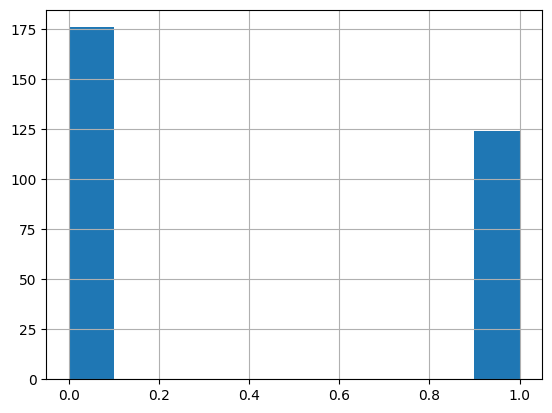

In [24]:
%matplotlib inline
labels_df['label'][0:300].hist();

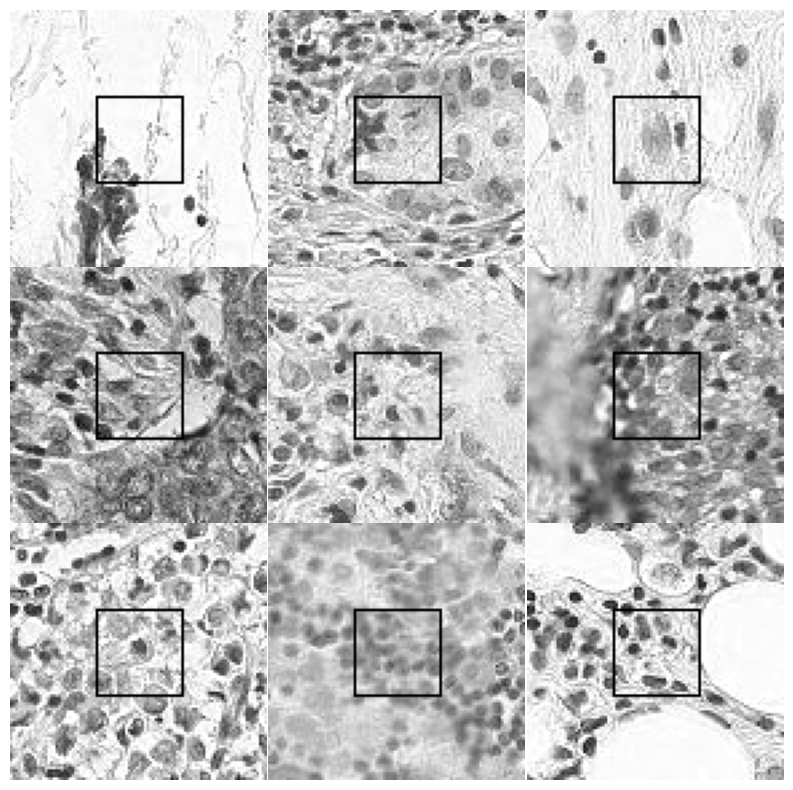

In [25]:
import matplotlib.pylab as plt
from PIL import Image, ImageDraw
import os
%matplotlib inline

# data is stored here
path2train = '/kaggle/input/histopathologic-cancer-detection/train'

# show images in gray-scale
color = False

# get ids for images
Ids = labels_df.loc [labels_df ['label']==1]['id'].values

plt.rcParams ['figure.figsize'] = (10.0, 10.0)
plt.subplots_adjust (wspace = 0, hspace = 0)
nrows, ncols = 3, 3
for i, id_ in enumerate (Ids [:nrows*ncols]):
    full_filenames = os.path.join (path2train, id_ +'.tif')
    
    # load image
    img = Image.open (full_filenames)
    
    # draw a 32*32 rectangle
    draw = ImageDraw.Draw (img)
    draw.rectangle (((32, 32), (64, 64)), outline = "green")
    
    plt.subplot (nrows, ncols, i + 1)
    if color is True:
        plt.imshow (np.array (img))
    else:
        plt.imshow (np.array (img)[:,:, 0], cmap = "gray")
    plt.axis ("off")

In [26]:
print ("image shape:", np.array (img).shape)
print ("pixel values range from %s to %s" %(np.min(img), np.max (img)))

image shape: (96, 96, 3)
pixel values range from 0 to 255


**Create a cusstom dataset**

In [27]:
from torch.utils.data import Dataset
import torchvision.transforms as transforms

# fix torch random seed
torch.manual_seed (0)

class histoCancerDataset (Dataset):
    def __init__ (self, data_dir, transform, data_type = "train"):
        path2data = os.path.join (data_dir, data_type)
        filenames = os.listdir (path2data)
        self.full_filenames = [os.path.join (path2data, f) for f in filenames]
        csv_filename = data_type + "_labels.csv"
        path2csvLabels = os.path.join (data_dir, csv_filename)
        labels_df = pd.read_csv (path2csvLabels)
        
        labels_df.set_index ("id", inplace = True)
        
        self.labels = [labels_df.loc [filename [:-4]].values[0] for filename in filenames]
        self.transform = transform
        
    def __len__ (self):
        return len (self.full_filenames)
    
    def __getitem__ (self, idx):
        image = Image.open (self.full_filenames [idx])
        image = self.transform (image)
        return image, self.labels  [idx]
    
data_transformer = transforms.Compose ([transforms.ToTensor ()])
data_dir = "/kaggle/input/histopathologic-cancer-detection"
histo_dataset = histoCancerDataset (data_dir, data_transformer, "train")
print (len (histo_dataset))

220025


In [28]:
# load an image 
img, label = histo_dataset [9]
print (img.shape, torch.min (img), torch.max (img))

torch.Size([3, 96, 96]) tensor(0.0667) tensor(1.)


**Split the dataset**

In [29]:
from torch.utils.data import random_split

len_histo = len (histo_dataset)
len_train = int (0.8 * len_histo)
len_val = len_histo-len_train

train_ds, val_ds = random_split (histo_dataset, [len_train, len_val])

print ("train dataset length:", len (train_ds))
print ("validation dataset length:", len (val_ds))

train dataset length: 176020
validation dataset length: 44005


In [30]:
# get the image from the training dataset

for x, y in train_ds:
    print (x.shape, y)
    break

torch.Size([3, 96, 96]) 1


In [31]:
# get the image from the validation dataset

for x, y in val_ds:
    print (x.shape, y)
    break

torch.Size([3, 96, 96]) 0


image indices: [ 43567 173685 117952 152315]
torch.Size([3, 100, 394])


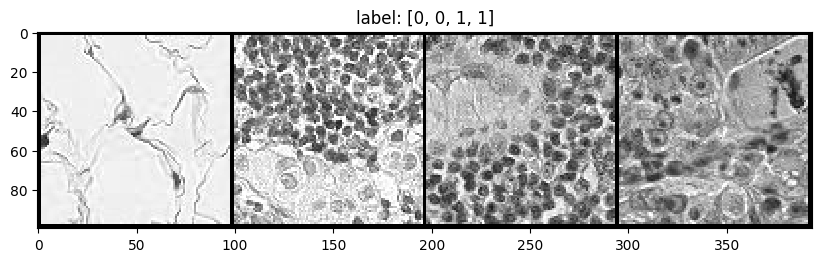

In [32]:
# get a few samples from training dataset
from torchvision import utils

np.random.seed (0)

def show (img, y, color = False):
    # conver tensor to numpy array
    npimg = img.numpy ()
    # convert to H*W*C shape
    npimg_tr = np.transpose (npimg, (1, 2, 0))
    if color == False:
        npimg_tr = npimg_tr [:, :, 0]
        plt.imshow (npimg_tr, interpolation = 'nearest', cmap = 'gray')
    else:
        # display images
        plt.imshow (npimg_tr, interpolation = 'nearest')
    plt.title ("label: "+ str (y))
    
grid_size = 4
rnd_inds = np.random.randint (0, len (train_ds), grid_size)
print ("image indices:", rnd_inds)

x_grid_train = [train_ds [i][0] for i in rnd_inds]
y_grid_train = [train_ds [i][1] for i in rnd_inds]

x_grid_train = utils.make_grid (x_grid_train, nrow = 4, padding = 2)
print (x_grid_train.shape)

plt.rcParams ['figure.figsize'] = (10.0, 5)
show (x_grid_train, y_grid_train)


image indices: [30403 32103 41993 20757]
torch.Size([3, 100, 394])


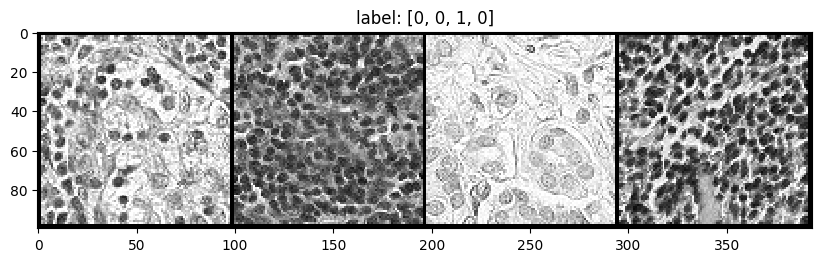

In [33]:
# get a few samples from validation dataset
grid_size = 4
rnd_inds = np.random.randint (0, len (val_ds), grid_size)
print ("image indices:", rnd_inds)

x_grid_val = [val_ds [i][0] for i in range (grid_size)]
y_grid_val = [val_ds [i][1] for i in range (grid_size)]

x_grid_val = utils.make_grid (x_grid_val, nrow = 4, padding = 2)
print (x_grid_val.shape)

show (x_grid_val, y_grid_val)

**Transforming the data**

In [34]:
train_transformer = transforms.Compose ([
    transforms.RandomHorizontalFlip (p = 0.5),
    transforms.RandomVerticalFlip (p = 0.5),
    transforms.RandomRotation (45),
    transforms.RandomResizedCrop (96, scale = (0.8, 1.0), ratio = (1.0, 1.0)),
    transforms.ToTensor ()
])

val_transformer = transforms.Compose ([transforms.ToTensor ()])

# overwrite the transform functions
train_ds.transform = train_transformer
val_ds.transform = val_transformer

# creating dataloaders
from torch.utils.data import DataLoader
train_dl = DataLoader (train_ds, batch_size = 32, shuffle = True)
val_dl = DataLoader (val_ds, batch_size = 64, shuffle = False)

# extract a batch from training data
for x, y in train_dl:
    print (x.shape)
    print (y.shape)
    break

torch.Size([32, 3, 96, 96])
torch.Size([32])


In [35]:
# get the data from the valuidation dataloader
for x, y in val_dl:
    print (x.shape)
    print (y.shape)
    break

torch.Size([64, 3, 96, 96])
torch.Size([64])


**Building the classification model**

In [36]:
# get labels for validation dataset
y_val = [y for _, y in val_ds]

def accuracy (labels, out):
    return np.sum (out == labels) / float (len (labels))

# accuracy all zero predictions
acc_all_zeros = accuracy (y_val, np.zeros_like (y_val))
print ("accuracy all zero prediction: %.2f" %acc_all_zeros)

accuracy all zero prediction: 0.59


In [37]:
# accuracy all ones predictions
acc_all_ones = accuracy (y_val, np.ones_like (y_val))
print ("accuracy all one prediction: %.2f" %acc_all_ones)

accuracy all one prediction: 0.41


In [38]:
# accuracy all random predictions
acc_random = accuracy (y_val, np.random.randint (2, size = len (y_val)))
print ("accuracy random prediction: %2f" %acc_random)

accuracy random prediction: 0.496103


In [39]:
import torch.nn as nn

# helper function for calculating the output size of a CNN layer
def findConv2dOutShape (H_in, W_in, conv, pool = 2):
    # get conv arguments
    kernel_size = conv.kernel_size
    stride = conv.stride
    padding = conv.padding 
    dilation = conv.dilation
    
    H_out = np.floor ((H_in + 2 * padding [0] -
                      dilation[0] * (kernel_size[0] - 1)- 1) /stride [0] + 1)
    W_out = np.floor ((W_in + 2 * padding [1] - dilation[1] * 
                      (kernel_size [1] - 1)-1) / stride [1] + 1)
    if pool:
        H_out /= pool
        W_out /= pool
    return int (H_out), int (W_out)

# provide the example
conv1 = nn.Conv2d (3, 8, kernel_size = 3)
h, w = findConv2dOutShape (96, 96, conv1)
print (h, w)

47 47


In [40]:
# define the Net class
class Net (nn.Module):
    def __init__ (self, params):
        super (Net, self).__init__()
        C_in, H_in, W_in = params ['input_shape']
        init_f = params ['initial_filters']
        num_fc1 = params ['num_fc1']
        num_classes = params ['num_classes']
        self.dropout_rate = params ['dropout_rate']
        self.conv1 = nn.Conv2d (C_in, init_f, kernel_size = 3)
        h, w = findConv2dOutShape (H_in, W_in, self.conv1)
        self.conv2 = nn.Conv2d (init_f, 2 * init_f, kernel_size = 3)
        h, w = findConv2dOutShape (h, w, self.conv2)
        self.conv3 = nn.Conv2d (2 * init_f, 4 * init_f, kernel_size = 3)
        h, w = findConv2dOutShape (h, w, self.conv3)
        self.conv4 = nn.Conv2d (4 * init_f, 8 * init_f, kernel_size = 3)
        h, w = findConv2dOutShape (h, w, self.conv4)
        # compute the flatten size
        self.num_flatten = h * w * 8 * init_f
        self.fc1 = nn.Linear (self.num_flatten, num_fc1)
        self.fc2 = nn.Linear (num_fc1, num_classes)
        
    # define the forward function
    def forward (self, x):
        x = F.relu (self.conv1 (x))
        x = F.max_pool2d (x, 2, 2)
        x = F.relu (self.conv2(x))
        x = F.max_pool2d (x, 2, 2)
        x = F.relu (self.conv3(x))
        x = F.max_pool2d (x, 2, 2)
        x = F.relu (self.conv4(x))
        x = F.max_pool2d (x, 2, 2)
        x = x.view (-1, self.num_flatten)
        x = F.relu (self.fc1 (x))
        x = F.dropout (x, self.dropout_rate, training = self.training)
        x = self.fc2 (x)
        return F.log_softmax (x, dim = 1)
    
# dict to define model parameters
params_model = {
    "input_shape": (3, 96, 96),
    "initial_filters": 8,
    "num_fc1": 100,
    "dropout_rate": 0.25,
    "num_classes": 2,
}

# create the model
cnn_model = Net (params_model)

# move model to gpu device
if torch.cuda.is_available ():
    device = torch.device ('cuda')
    cnn_model = cnn_model.to (device)

print (cnn_model)

Net(
  (conv1): Conv2d(3, 8, kernel_size=(3, 3), stride=(1, 1))
  (conv2): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (conv3): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (conv4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=1024, out_features=100, bias=True)
  (fc2): Linear(in_features=100, out_features=2, bias=True)
)


In [41]:
from torchsummary import summary
summary (cnn_model, input_size = (3, 96, 96), device = device.type)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 8, 94, 94]             224
            Conv2d-2           [-1, 16, 45, 45]           1,168
            Conv2d-3           [-1, 32, 20, 20]           4,640
            Conv2d-4             [-1, 64, 8, 8]          18,496
            Linear-5                  [-1, 100]         102,500
            Linear-6                    [-1, 2]             202
Total params: 127,230
Trainable params: 127,230
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.11
Forward/backward pass size (MB): 0.92
Params size (MB): 0.49
Estimated Total Size (MB): 1.51
----------------------------------------------------------------


**Define the loss function**

In [42]:
loss_func = nn.NLLLoss (reduction = 'sum')

# fix random seed
torch.manual_seed (0)

n, c = 8, 2
y = torch.randn (n, c, requires_grad = True)
ls_F = nn.LogSoftmax (dim = 1)
y_out = ls_F (y)
print (y_out.shape)

target = torch.randint (c, size = (n, ))
print (target.shape)

loss = loss_func (y_out, target)
print (loss.item ())

torch.Size([8, 2])
torch.Size([8])
5.266995429992676


In [43]:
# compute the gradients
loss.backward ()
print (y.data)

tensor([[-1.1258, -1.1524],
        [-0.2506, -0.4339],
        [ 0.8487,  0.6920],
        [-0.3160, -2.1152],
        [ 0.3223, -1.2633],
        [ 0.3500,  0.3081],
        [ 0.1198,  1.2377],
        [ 1.1168, -0.2473]])


**Define the optimizer**

In [44]:
from torch import optim

opt = optim.Adam (cnn_model.parameters (), lr = 3e-4)

# get the learning rate
def get_lr (opt):
    for param_group in opt.param_groups:
        return param_group ['lr']

current_lr = get_lr (opt)
print ('current lr = {}'.format (current_lr))

current lr = 0.0003


In [45]:
# define a learning scheduler
from torch.optim.lr_scheduler import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau (opt, mode = 'min', factor = 0.5, patience = 20, verbose = 1)

for i in range (100):
    lr_scheduler.step (1)

Epoch 00022: reducing learning rate of group 0 to 1.5000e-04.
Epoch 00043: reducing learning rate of group 0 to 7.5000e-05.
Epoch 00064: reducing learning rate of group 0 to 3.7500e-05.
Epoch 00085: reducing learning rate of group 0 to 1.8750e-05.


**Training and evaluation of the model**

In [46]:
# function to count the number of correct predictions per batch
def metrics_batch (output, target):
    # get output class
    pred = output.argmax (dim = 1, keepdim = True)
    # compare output class with target class
    corrects = pred.eq (target.view_as (pred)).sum ().item ()
    return corrects

# function to compute the loss value per batch
def loss_batch (loss_func, output, target, opt = None):
    loss = loss_func (output, target)
    with torch.no_grad ():
        metric_b = metrics_batch (output, target)
    if opt is not None:
        opt.zero_grad ()
        loss.backward ()
        opt.step ()
    return loss.item (), metric_b

# function to compute the loss value and performance metric for an epoch
def loss_epoch (model, loss_func, dataset_dl, sanity_check = False, opt = None):
    running_loss = 0.0
    running_metric = 0.0
    len_data = len (dataset_dl.dataset)
    
    for xb, yb in dataset_dl:
        # move batch to device
        xb = xb.to (device)
        yb = yb.to (device)
        # get model output
        output = model (xb)
        # get loss per batch
        loss_b, metric_b = loss_batch (loss_func, output, yb, opt)
        # update running loss
        running_loss += loss_b
        # update running metric
        if metric_b is not None:
            running_metric += metric_b
        # break the loop in case of sanity check
        if sanity_check is True:
            break
            
    # average loss value
    loss = running_loss / float (len_data)
    # avearge metric value
    metric = running_metric / float (len_data)
    return loss, metric

# train and validation function
def train_val (model, params):
    # extract model parameters
    num_epochs = params ["num_epochs"]
    loss_func = params ["loss_func"]
    opt = params ["optimizer"]
    train_dl = params ["train_dl"]
    val_dl = params ["val_dl"]
    sanity_check = params ["sanity_check"]
    lr_scheduler = params ["lr_scheduler"]
    path2weights = params ["path2weights"]
    
    # history of loss values of each epoch
    loss_history = {"train": [], "val": [], }
    # history of metric values in each epoch
    metric_history = {"train": [], "val": [], }
    
    # a deep copy of weights for the best performing model
    best_model_wts = copy.deepcopy (model.state_dict ())
    
    # initialize best loss to a large value
    best_loss = float ('inf')
    
    # loop that will calculate the training loss over an epoch
    for epoch in range (num_epochs):
        # get current learning rate
        current_lr = get_lr (opt)
        print ('Epoch {}/{}, current lr = {}'.format (epoch, num_epochs - 1, current_lr))
        
        # train model on training dataset
        model.train ()
        train_loss, train_metric = loss_epoch (model, loss_func, train_dl, sanity_check, opt)
        
        # collect loss and metric for training dataset
        loss_history ["train"].append (train_loss)
        metric_history["train"].append (train_metric)
        
        # evaluate the model on validation dataset
        model.eval ()
        with torch.no_grad ():
            val_loss, val_metric = loss_epoch (model, loss_func, val_dl, sanity_check)
        
        # collect loss and metric for validation dataset
        loss_history ["val"].append (val_loss)
        metric_history ["val"].append (val_metric)
        
        # store best model
        if val_loss < best_loss:
            best_loss = val_loss
            best_model_wts = copy.deepcopy (model.state_dict ())
            
            # store weights into a local file
            torch.save (model.state_dict (), path2weights)
            print ('Copied best model weights')
            
        # learning rate schedule
        lr_scheduler.step (val_loss)
        if current_lr != get_lr (opt):
            print ("Loading best model weights")
            model.load_state_dict (best_model_wts)
            
        print ("train_loss: %.6f, dev_loss: %.6f, accuracy: %.2f" %(train_loss, val_loss, 100 * val_metric))
        print ("-" * 10)
    
    # load best model weights
    model.load_state_dict (best_model_wts)
    return model, loss_history, metric_history

import copy
loss_func = nn.NLLLoss (reduction = "sum")
opt = optim.Adam (cnn_model.parameters (), lr = 3e-4)
lr_scheduler = ReduceLROnPlateau (opt, mode = "min", factor = 0.5, patience = 20, verbose = 1)

params_train = {
    "num_epochs": 100,
    "optimizer": opt,
    "loss_func": loss_func,
    "train_dl": train_dl,
    "val_dl": val_dl,
    "sanity_check": True,
    "lr_scheduler": lr_scheduler,
    "path2weights": "/kaggle/working/FashionMNIST/weights.pt",
}

# train and validate the model
cnn_model, loss_hist, metric_hist = train_val (cnn_model, params_train)

Epoch 0/99, current lr = 0.0003
Copied best model weights
train_loss: 0.000123, dev_loss: 0.000992, accuracy: 0.09
----------
Epoch 1/99, current lr = 0.0003
Copied best model weights
train_loss: 0.000123, dev_loss: 0.000990, accuracy: 0.09
----------
Epoch 2/99, current lr = 0.0003
Copied best model weights
train_loss: 0.000127, dev_loss: 0.000988, accuracy: 0.09
----------
Epoch 3/99, current lr = 0.0003
Copied best model weights
train_loss: 0.000121, dev_loss: 0.000987, accuracy: 0.09
----------
Epoch 4/99, current lr = 0.0003
Copied best model weights
train_loss: 0.000126, dev_loss: 0.000985, accuracy: 0.09
----------
Epoch 5/99, current lr = 0.0003
Copied best model weights
train_loss: 0.000127, dev_loss: 0.000985, accuracy: 0.09
----------
Epoch 6/99, current lr = 0.0003
Copied best model weights
train_loss: 0.000121, dev_loss: 0.000984, accuracy: 0.09
----------
Epoch 7/99, current lr = 0.0003
Copied best model weights
train_loss: 0.000127, dev_loss: 0.000983, accuracy: 0.09
---

**Plot the progress of learning**

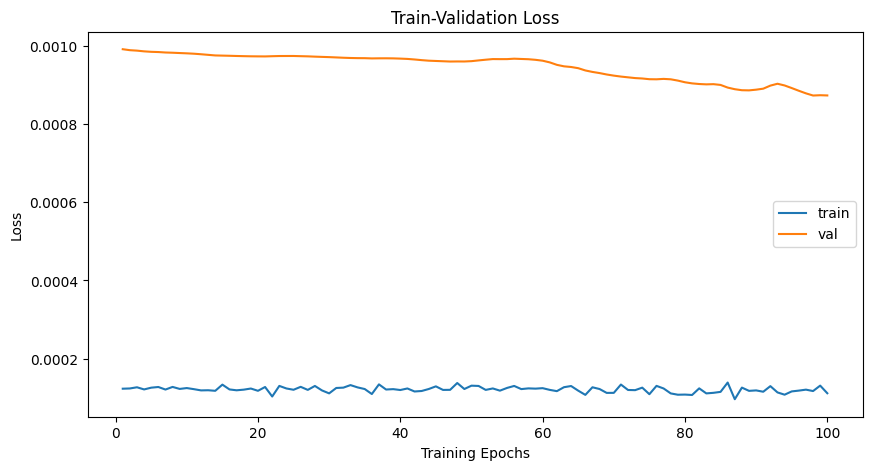

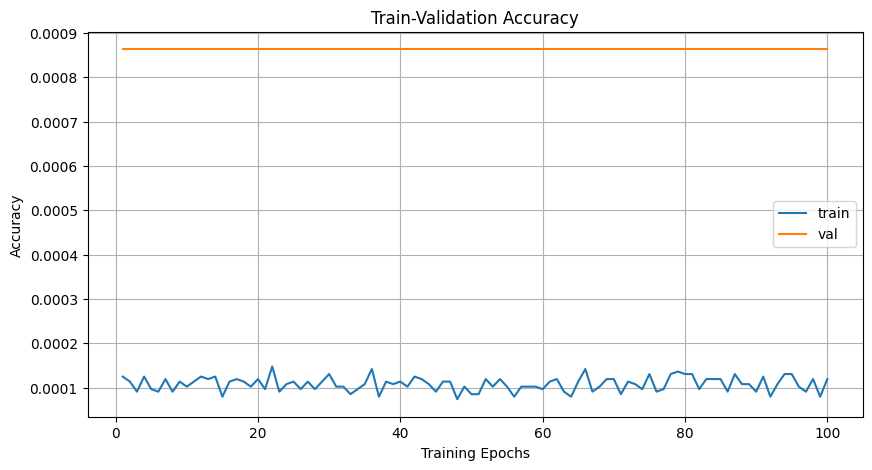

In [47]:
# train validation progress
num_epochs = params_train ['num_epochs']

# plot loss progress
plt.title ("Train-Validation Loss")
plt.plot (range (1, num_epochs + 1), loss_hist ["train"], label = "train")
plt.plot (range (1, num_epochs + 1), loss_hist ["val"], label = "val")
plt.ylabel ("Loss")
plt.xlabel ("Training Epochs")
plt.legend ()
plt.show ()

# plot accuracy progress
plt.title ("Train-Validation Accuracy")
plt.plot (range (1, num_epochs + 1), metric_hist ["train"], label = "train")
plt.plot (range (1, num_epochs + 1), metric_hist ["val"], label = "val")
plt.ylabel ("Accuracy")
plt.xlabel ("Training Epochs")
plt.legend ()
plt.grid ()
plt.show ()